In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"




In [8]:
!pip install pandas

In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
df=pd.read_csv("C:/Users/Akshay Yadav/Downloads/archive/Height of Male and Female by Country 2022.csv")

In [12]:
df.head(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [74]:
df.tail(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
194,195,Mozambique,164.30,155.42,5.39,5.10
195,196,Papua New Guinea,163.10,156.89,5.35,5.15
196,197,Solomon Islands,163.07,156.79,5.35,5.14
197,198,Laos,162.78,153.10,5.34,5.02
198,199,Timor-Leste,160.13,152.71,5.25,5.01


In [13]:
df.shape

(199, 6)

In [14]:
df.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Male Height in Ft      float64
Female Height in Ft    float64
dtype: object

In [15]:
df.info

<bound method DataFrame.info of      Rank            Country Name  Male Height in Cm  Female Height in Cm  \
0       1             Netherlands             183.78               170.36   
1       2              Montenegro             183.30               169.96   
2       3                 Estonia             182.79               168.66   
3       4  Bosnia and Herzegovina             182.47               167.47   
4       5                 Iceland             182.10               168.91   
..    ...                     ...                ...                  ...   
194   195              Mozambique             164.30               155.42   
195   196        Papua New Guinea             163.10               156.89   
196   197         Solomon Islands             163.07               156.79   
197   198                    Laos             162.78               153.10   
198   199             Timor-Leste             160.13               152.71   

     Male Height in Ft  Female Height in Ft

In [16]:
df.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


In [17]:
df.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [19]:
#Check missing values(Sum-how many missing values exists)
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [21]:
#Dropping unncessary column
df.drop(["Rank","Male Height in Cm","Female Height in Cm"],axis=1)

,Country Name,Male Height in Ft,Female Height in Ft
0,Netherlands,6.03,5.59
1,Montenegro,6.01,5.58
2,Estonia,6.00,5.53
3,Bosnia and Herzegovina,5.99,5.49
4,Iceland,5.97,5.54
...,...,...,...
194,Mozambique,5.39,5.10
195,Papua New Guinea,5.35,5.15
196,Solomon Islands,5.35,5.14
197,Laos,5.34,5.02


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
plt.figure(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

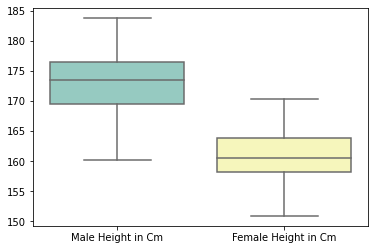

In [80]:
sns.boxplot(data = df.loc[:,['Male Height in Cm', 'Female Height in Cm']], palette = 'Set3')

In [32]:
#Average height of men in cm
avg_height_men=df["Male Height in Cm"].mean()
avg_height_men

173.08904522613054

In [33]:
#Average height of female in cm
avg_height_female=df["Female Height in Cm"].mean()
avg_height_female

160.9429145728643

In [60]:
#Find tallest male per country
max_value_male=df["Male Height in Cm"].idxmax()
max_value_country=df["Country Name"][max_value_male]
print(f"The tallest Male or height of male is :{max_value_country} at {df['Male Height in Cm'].max()}")                                 


The tallest Male or height of male is :Netherlands at 183.78


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Male Height in Cm'>

(175.0, 185.0)

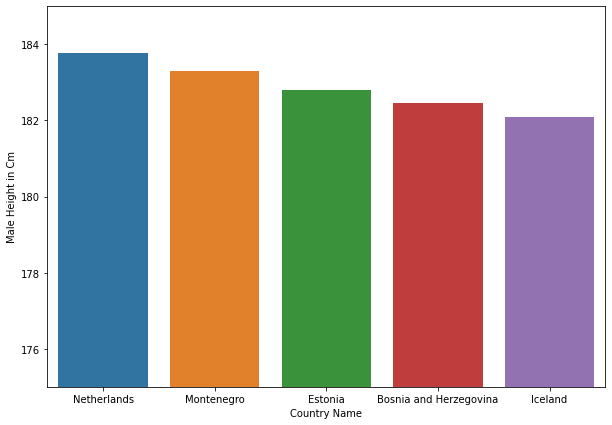

In [68]:
# Visulaiization for male_height
plt.figure(figsize=(10,7))

top_height = df.sort_values('Male Height in Cm',ascending=False).head()
sns.barplot(x='Country Name',y = df['Male Height in Cm'],data = top_height)
plt.ylim(ymax=185,ymin=175)

In [61]:
#Find tallest Fale per country
max_value_female=df["Female Height in Cm"].idxmax()
max_value_country=df["Country Name"][max_value_male]
print(f"The tallest Male or height of Female is :{max_value_country} at {df['Female Height in Cm'].max()}")

The tallest Male or height of Female is :Netherlands at 170.36


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Female Height in Cm'>

(150.0, 180.0)

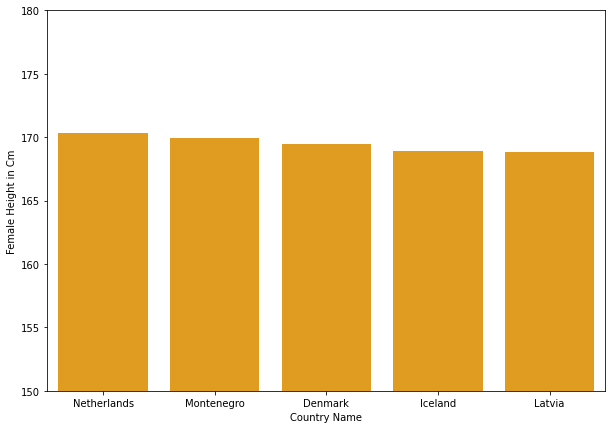

In [73]:
# Visulaiization for female_height
plt.figure(figsize=(10,7))
top_height_female = df.sort_values('Female Height in Cm',ascending=False).head()
sns.barplot(x='Country Name',y = df['Female Height in Cm'],data = top_height_female,color = 'orange')
plt.ylim(ymax=180,ymin=150)

In [69]:
# find smallest male per country
min_value_male = df['Male Height in Cm'].idxmin()
min_value_country =df['Country Name'][min_value_male]
print(f"The smallest male or height  is :{min_value_country} at {df['Male Height in Cm'].min()}")

The smallest male or height  is :Timor-Leste at 160.13


In [70]:
# short Female
min_value_female = df['Female Height in Cm'].idxmin()
min_value_country =df['Country Name'][min_value_female]
print(f"The smallest female or height  is :{min_value_country} at {df['Female Height in Cm'].min()}")

The smallest female or height  is :Guatemala at 150.91


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Male Height in Cm'>

(150.0, 175.0)

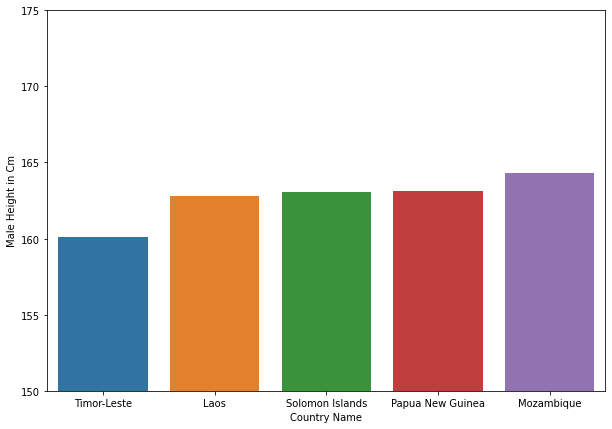

In [71]:
# Visulaiization for shortest_male_height
plt.figure(figsize=(10,7))

shortest_height = df.sort_values('Male Height in Cm',ascending=True).head()
sns.barplot(x='Country Name',y = df['Male Height in Cm'],data = shortest_height)
plt.ylim(ymax=175,ymin=150)

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Country Name', ylabel='Female Height in Cm'>

(150.0, 170.0)

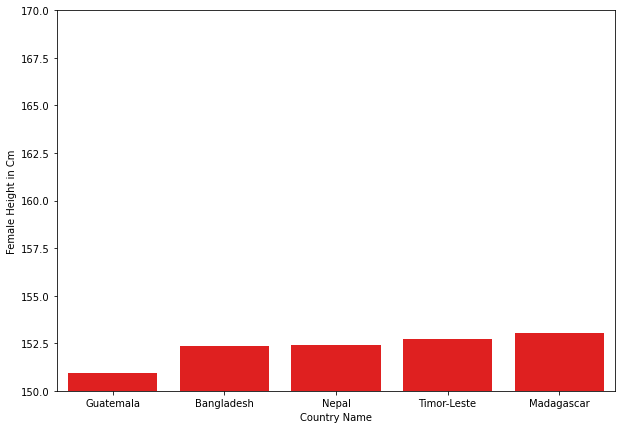

In [72]:
# Visulaiization for female_height
plt.figure(figsize=(10,7))
shortest_height_female = df.sort_values('Female Height in Cm',ascending=True).head()
sns.barplot(x='Country Name',y = df['Female Height in Cm'],data = shortest_height_female,color = 'red')
plt.ylim(ymax=170,ymin=150)

<AxesSubplot:ylabel='Male Height in Cm'>

Text(0, 0.5, 'Male Height in Cm ($)')

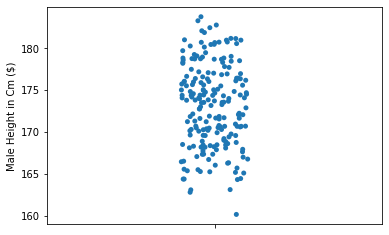

In [81]:
#Strip plot

sns.stripplot(y="Male Height in Cm", data=df,jitter=True)
plt.ylabel("Male Height in Cm ($)")
plt.show()

<AxesSubplot:xlabel='Male Height in Cm', ylabel='Country Name'>

Text(0, 0.5, 'Male Height in Cm ($)')

<Figure size 1800x1800 with 0 Axes>

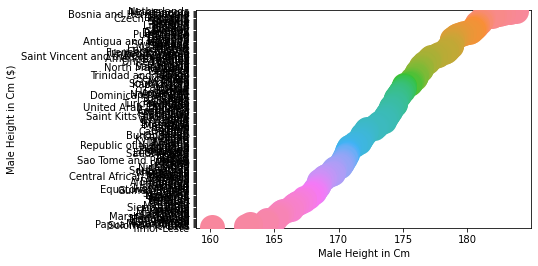

<Figure size 1800x1800 with 0 Axes>

In [104]:
#Grouping with Stripplot()

sns.stripplot(y='Country Name',x='Male Height in Cm', data=df,size=25, jitter= False)
plt.ylabel("Male Height in Cm ($)")
plt.figure(figsize=(25,25))
plt.show()

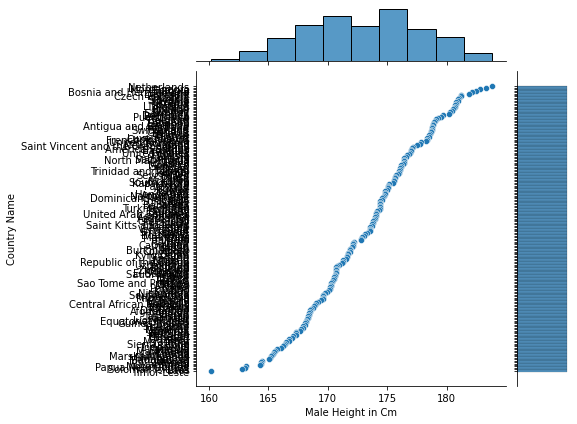

In [113]:
#Density plot
sns.jointplot(y="Country Name",x="Male Height in Cm", data=df)
plt.show()

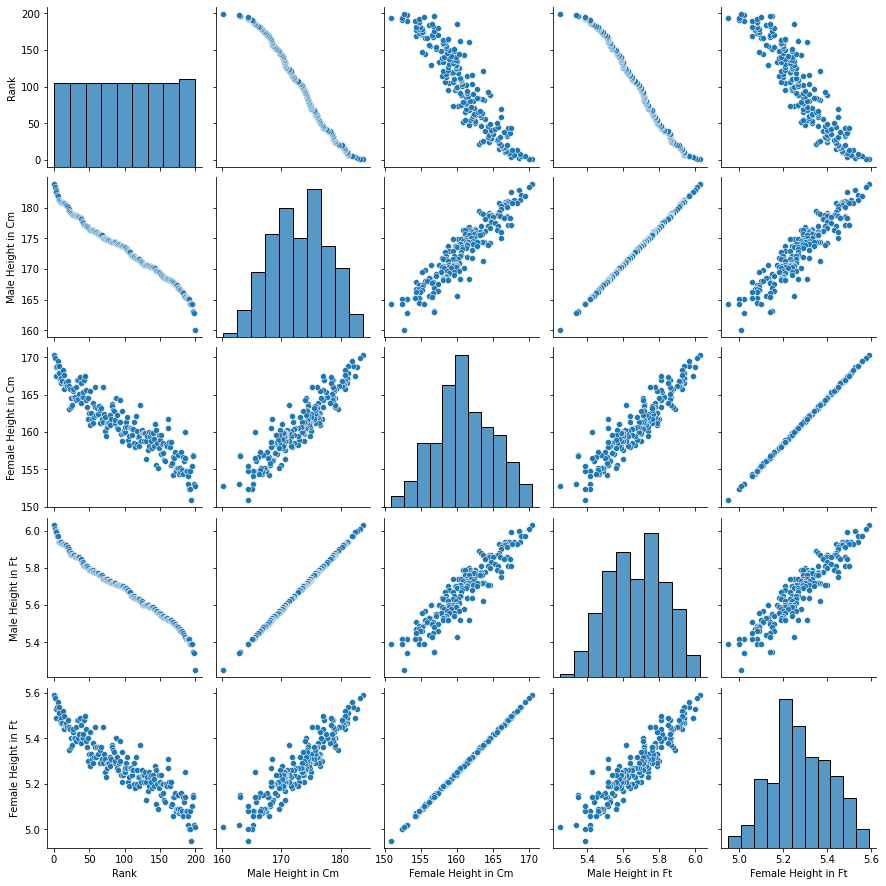

In [112]:
#Pair plot
sns.pairplot(df)
plt.show()

In [110]:
df="Male Height in Cm","Female Height in Cm"